In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

In [12]:
def ff(Q, a, b, c):
    Q = np.array(Q)
    Q = Q / (4 * np.pi)
    fofQ = a[0] * np.exp(-b[0] * (Q/4*np.pi)**2) + \
           a[1] * np.exp(-b[1] * (Q/4*np.pi)**2) + \
           a[2] * np.exp(-b[2] * (Q/4*np.pi)**2) + \
           a[3] * np.exp(-b[3] * (Q/4*np.pi)**2) + c
    return fofQ

def hcp_term(l, h, k, pole_atol=1e-12):
    """Bulk semi-infinite term for hcp Ru(0001) rods"""
    den = np.sin(np.pi * l)
    num = np.exp(-1j * np.pi * l) * (1.0 + np.exp(2j * np.pi * (h/3 + 2*k/3 - l/2)))
    F = num/den
    return (1/(2j)) * F

def Ru_SF(l, h=1, k=0, c=4.268, u_bulk=0.0027, layers=()):
    # each layer: dict(z=..., u=..., fscale=1.0)
    
    a_crys = 2.708 #Equivalent to b for Hexagonal System
    c_crys = c
    
    Q = 2*np.pi * (np.sqrt( (4/3) * ( (h**2 + h*k + k**2)/a_crys**2 ) + (l**2/c_crys**2) ) )
    
    #See this website for a,b, and c values http://lampx.tugraz.at/~hadley/ss1/crystaldiffraction/atomicformfactors/formfactors.php
    a_Ru = [19.2674, 12.9182, 4.86337, 1.56756]
    b_Ru = [0.80852, 8.43467, 24.7997, 94.2928]
    c_Ru = [5.37874]
    
    ff_Ru = ff(Q, a_Ru, b_Ru, c_Ru)
    
    l = np.asarray(l, dtype=float)
    Q = np.asarray(Q, dtype=float)

    DBW_bulk = np.exp(-(Q**2*u_bulk)*2) 

    Fplus = hcp_term(l, h,  k)
    Fneg = hcp_term(l, -h, -k)
    F_CTR = 0.5 * (Fplus + Fneg)

    # Multiply by bulk form factor and DW
    F_bulk_total = (ff_Ru * DBW_bulk) * F_CTR

    #Phase Factor for sum of "single" scattering events occuring at the crystal surfae in the in-plane direction)
    outer_termplus = np.exp(2j * np.pi * (h/3+ (2*k/3)))
    outer_termneg = np.exp(2j * np.pi * (-1*h/3+ (-1*2*k/3)))

    outer_term = 0.5 * (outer_termplus + outer_termneg)

    # Sum of surface layers (each: DW * form factor * vertical phase)
    F_surf_sum = np.zeros_like(l, dtype=complex)
    for layer in layers:
        z  = float(layer.get("z", 0.0))
        uL = float(layer.get("u", u_bulk))
        fL = layer.get("ff", ff_Ru)
        scale = layer.get("scale", 1.0)
        if fL is None:
            fL = 1.0

        DBW_L = np.exp(-(Q**2*uL)*2) 
        phase_z = np.exp((-1j * (2 * np.pi) * l/c_crys * (c_crys+z)/2))
        F_surf_sum += (scale*fL * DBW_L) * phase_z

    F_total = F_bulk_total + outer_term * F_surf_sum
    return F_total

def Ru_SF_square(*args, **kwargs):
    F = ctr_ru_0001_F(*args, **kwargs)
    return np.abs(F)**2

In [29]:
l = np.linspace(0, 5, 400)

## Travis Simulations - Temp Ramping under Vacuum - 1 Layer Models
**Model Not Changing C Lattice Parameter discrepency

In [39]:
layer_27C = [{"z": 0.00, "u": 0.0030}]
F_Ru_27C_sim = Ru_SF(l, h=1, k=0, c=4.268, u_bulk=0.0030, layers = layer_27C)

layer_100C = [{"z": 0.007, "u": 0.0032}]
F_Ru_100C_sim = Ru_SF(l, h=1, k=0, c=4.268, u_bulk=0.004, layers = layer_100C)

layer_200C = [{"z": 0.007, "u": 0.0035}]
F_Ru_200C_sim = Ru_SF(l, h=1, k=0, c=4.268, u_bulk=0.005, layers = layer_200C)

layer_300C = [{"z": 0.008, "u": 0.0050}]
F_Ru_300C_sim = Ru_SF(l, h=1, k=0, c=4.268, u_bulk=0.006, layers = layer_300C)

C:\Users\eedun\AppData\Local\Temp\ipykernel_35016\1658144845.py:14: RuntimeWarning: divide by zero encountered in divide
  F = num/den
C:\Users\eedun\AppData\Local\Temp\ipykernel_35016\1658144845.py:15: RuntimeWarning: invalid value encountered in multiply
  return (1/(2j)) * F


In [40]:
c = 4.268
Qz = 2*np.pi/c * l

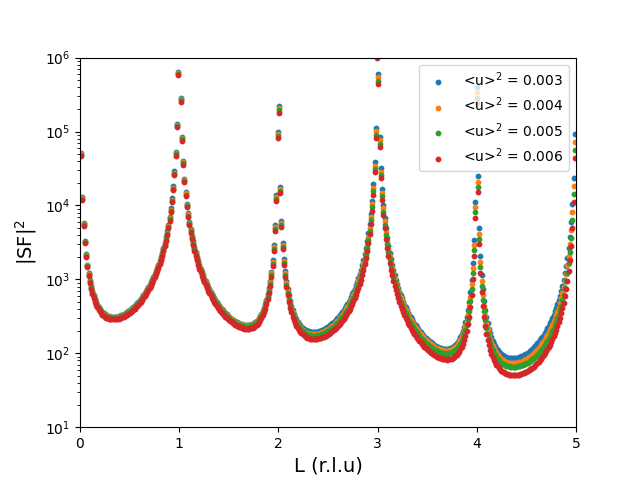

In [42]:
%matplotlib widget
plt.close('all')
plt.yscale('log')

plt.scatter(l,np.abs(F_Ru_27C_sim)**2, s = 10, label = '<u>$^2$ = 0.003')
plt.scatter(l,np.abs(F_Ru_100C_sim)**2, s = 10, label = '<u>$^2$ = 0.004')
plt.scatter(l,np.abs(F_Ru_200C_sim)**2, s = 10, label = '<u>$^2$ = 0.005')
plt.scatter(l,np.abs(F_Ru_300C_sim)**2, s = 10, label = '<u>$^2$ = 0.006')


# plt.title('Various CTR Models for Ru 10L at 75 $\degree$C')

plt.xlim(right = 5, left = 0)
# plt.ylim(top = 10**8, bottom = 10**6)
plt.xlabel('L (r.l.u)', fontsize = 14)
plt.ylabel('|SF|$^2$', fontsize = 14)
plt.yscale('log')
plt.legend()
plt.ylim(top = 10**6, bottom = 10**1)
plt.show()

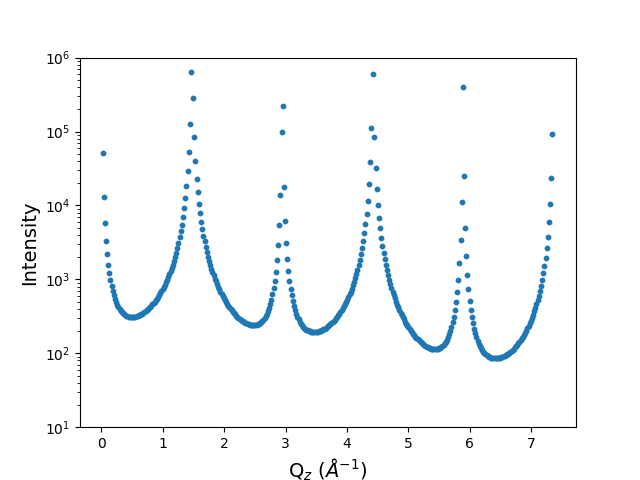

In [34]:
%matplotlib widget
plt.close('all')
plt.yscale('log')

plt.scatter(Qz,np.abs(F_Ru_27C_sim)**2, s = 10, label = 'Simulated 27 C')
# plt.scatter(l,np.abs(F_Ru_100C_sim)**2, s = 10, label = 'Simulated 100 C')
# plt.scatter(l,np.abs(F_Ru_200C_sim)**2, s = 10, label = 'Simulated 200 C')
# plt.scatter(l,np.abs(F_Ru_300C_sim)**2, s = 10, label = 'Simulated 300 C')


# plt.title('Various CTR Models for Ru 10L at 75 $\degree$C')

# plt.xlim(right = 6, left = 0)
# plt.ylim(top = 10**8, bottom = 10**6)
plt.xlabel(r'Q$_z$ ($\AA$$^{-1}$)', fontsize = 14)
plt.ylabel('Intensity', fontsize = 14)
plt.yscale('log')
# plt.legend()
plt.ylim(top = 10**6, bottom = 10**1)
plt.show()

## Travis Simulations - Temp Ramping under Vacuum - 1 Layer Models
**Including Lattice Param discrepancy

In [20]:
layer_27C_lattice = [{"z": 0.008, "u": 0.0044}]
F_Ru_27C_sim_lattice = Ru_SF(l, h=1, k=0, c=4.383, u_bulk=0.0030, layers = layer_27C_lattice)

layer_100C_lattice = [{"z": 0.007, "u": 0.0038}]
F_Ru_100C_sim_lattice = Ru_SF(l, h=1, k=0, c=4.384, u_bulk=0.0028, layers = layer_100C_lattice)

layer_200C_lattice = [{"z": 0.007, "u": 0.0056}]
F_Ru_200C_sim_lattice = Ru_SF(l, h=1, k=0, c=4.385, u_bulk=0.0035, layers = layer_200C_lattice)

layer_300C_lattice = [{"z": 0.008, "u": 0.0075}]
F_Ru_300C_sim_lattice = Ru_SF(l, h=1, k=0, c=4.387, u_bulk=0.0050, layers = layer_300C_lattice)

C:\Users\eedun\AppData\Local\Temp\ipykernel_21672\3717588584.py:14: RuntimeWarning: divide by zero encountered in divide
  F = num/den
C:\Users\eedun\AppData\Local\Temp\ipykernel_21672\3717588584.py:15: RuntimeWarning: invalid value encountered in multiply
  return (1/(2j)) * F


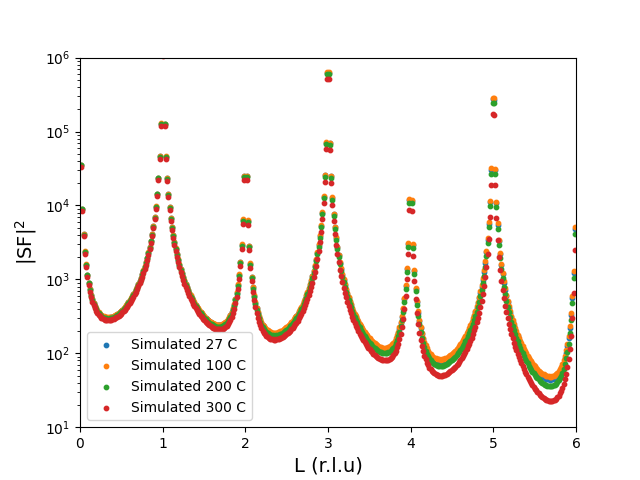

In [21]:
plt.close('all')
plt.yscale('log')

plt.scatter(l,np.abs(F_Ru_27C_sim_lattice)**2, s = 10, label = 'Simulated 27 C')
plt.scatter(l,np.abs(F_Ru_100C_sim_lattice)**2, s = 10, label = 'Simulated 100 C')
plt.scatter(l,np.abs(F_Ru_200C_sim_lattice)**2, s = 10, label = 'Simulated 200 C')
plt.scatter(l,np.abs(F_Ru_300C_sim_lattice)**2, s = 10, label = 'Simulated 300 C')


# plt.title('Various CTR Models for Ru 10L at 75 $\degree$C')

plt.xlim(right = 6, left = 0)
# plt.ylim(top = 10**8, bottom = 10**6)
plt.xlabel('L (r.l.u)', fontsize = 14)
plt.ylabel('|SF|$^2$', fontsize = 14)
plt.yscale('log')
plt.legend()
plt.ylim(top = 10**6, bottom = 10**1)
plt.show()

*With and without Lattice Param Shift*

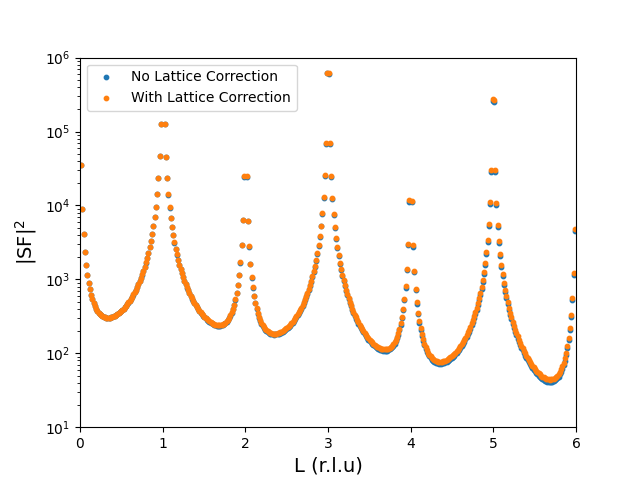

In [22]:
plt.close('all')
plt.yscale('log')

plt.scatter(l,np.abs(F_Ru_27C_sim)**2, s = 10, label = 'No Lattice Correction')
plt.scatter(l,np.abs(F_Ru_27C_sim_lattice)**2, s = 10, label = 'With Lattice Correction')

# plt.title('Various CTR Models for Ru 10L at 75 $\degree$C')

plt.xlim(right = 6, left = 0)
# plt.ylim(top = 10**8, bottom = 10**6)
plt.xlabel('L (r.l.u)', fontsize = 14)
plt.ylabel('|SF|$^2$', fontsize = 14)
plt.yscale('log')
plt.legend()
plt.ylim(top = 10**6, bottom = 10**1)
plt.show()

## Travis Simulations - Max Temp - 1 Layer Models
**Model Not Changing C Lattice Parameter discrepency

In [23]:
layer_250C_V =[{"z": 0.061, "u": 0.0087}]
F_Ru_250C_V_sim = Ru_SF(l, h=1, k=0, c=4.268, u_bulk=0.0053, layers = layer_250C_V)

layer_250C_H =[{"z": 0.006, "u": 0.0071}]
F_Ru_250C_H_sim = Ru_SF(l, h=1, k=0, c=4.268, u_bulk=0.0039, layers = layer_250C_H)

C:\Users\eedun\AppData\Local\Temp\ipykernel_21672\3717588584.py:14: RuntimeWarning: divide by zero encountered in divide
  F = num/den
C:\Users\eedun\AppData\Local\Temp\ipykernel_21672\3717588584.py:15: RuntimeWarning: invalid value encountered in multiply
  return (1/(2j)) * F


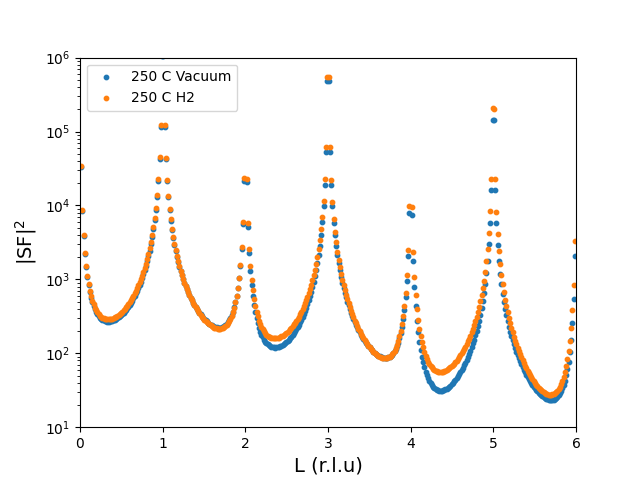

In [24]:
plt.close('all')
plt.yscale('log')

plt.scatter(l,np.abs(F_Ru_250C_V_sim)**2, s = 10, label = '250 C Vacuum')
plt.scatter(l,np.abs(F_Ru_250C_H_sim)**2, s = 10, label = '250 C H2')

# plt.title('Various CTR Models for Ru 10L at 75 $\degree$C')

plt.xlim(right = 6, left = 0)
# plt.ylim(top = 10**8, bottom = 10**6)
plt.xlabel('L (r.l.u)', fontsize = 14)
plt.ylabel('|SF|$^2$', fontsize = 14)
plt.yscale('log')
plt.legend()
plt.ylim(top = 10**6, bottom = 10**1)
plt.show()

In [25]:
## Comparing Across 200, 250, and 300 (DIFFERENT FORCE FIELDS ON 250)

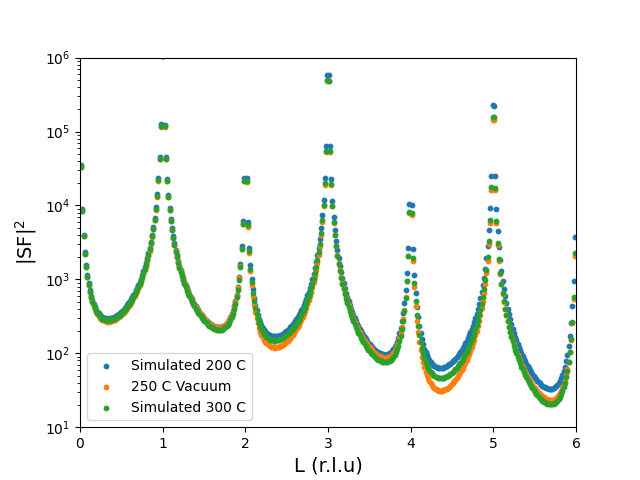

In [26]:
plt.close('all')
plt.yscale('log')

plt.scatter(l,np.abs(F_Ru_200C_sim)**2, s = 10, label = 'Simulated 200 C')
plt.scatter(l,np.abs(F_Ru_250C_V_sim)**2, s = 10, label = '250 C Vacuum')
plt.scatter(l,np.abs(F_Ru_300C_sim)**2, s = 10, label = 'Simulated 300 C')

# plt.title('Various CTR Models for Ru 10L at 75 $\degree$C')

plt.xlim(right = 6, left = 0)
# plt.ylim(top = 10**8, bottom = 10**6)
plt.xlabel('L (r.l.u)', fontsize = 14)
plt.ylabel('|SF|$^2$', fontsize = 14)
plt.yscale('log')
plt.legend()
plt.ylim(top = 10**6, bottom = 10**1)
plt.show()

## Travis Simulations - Max Temp - 1 Layer Models
**Model including C layer inconsistency

In [6]:
layer_250C_V_lattice = [{"z": 0.061, "u": 0.0087}]
F_Ru_250C_V_sim_lattice = Ru_SF(l, h=1, k=0, c=4.359, u_bulk=0.0053, layers = layer_250C_V_lattice)

layer_250C_H_lattice = [{"z": 0.006, "u": 0.0071}]
F_Ru_250C_H_sim_lattice = Ru_SF(l, h=1, k=0, c=4.409, u_bulk=0.0039, layers = layer_250C_H_lattice)

C:\Users\eedun\AppData\Local\Temp\ipykernel_18696\3717588584.py:14: RuntimeWarning: divide by zero encountered in divide
  F = num/den
C:\Users\eedun\AppData\Local\Temp\ipykernel_18696\3717588584.py:15: RuntimeWarning: invalid value encountered in multiply
  return (1/(2j)) * F


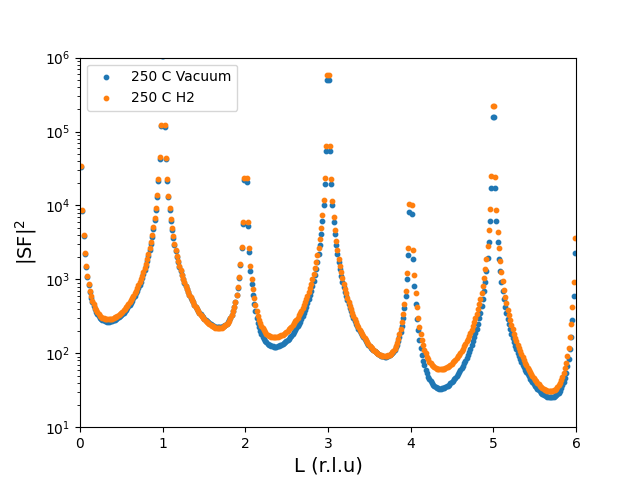

In [7]:
plt.close('all')
plt.yscale('log')

plt.scatter(l,np.abs(F_Ru_250C_V_sim_lattice)**2, s = 10, label = '250 C Vacuum')
plt.scatter(l,np.abs(F_Ru_250C_H_sim_lattice)**2, s = 10, label = '250 C H2')

# plt.title('Various CTR Models for Ru 10L at 75 $\degree$C')

plt.xlim(right = 6, left = 0)
# plt.ylim(top = 10**8, bottom = 10**6)
plt.xlabel('L (r.l.u)', fontsize = 14)
plt.ylabel('|SF|$^2$', fontsize = 14)
plt.yscale('log')
plt.legend()
plt.ylim(top = 10**6, bottom = 10**1)
plt.show()

*Lattice v no lattice shift

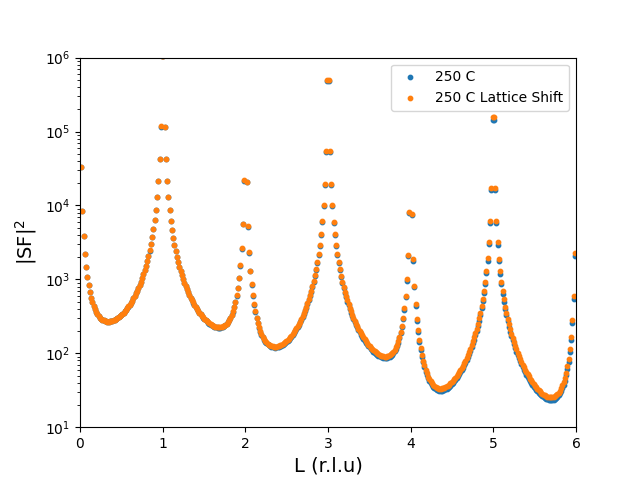

In [29]:
plt.close('all')
plt.yscale('log')

plt.scatter(l,np.abs(F_Ru_250C_V_sim)**2, s = 10, label = '250 C')
plt.scatter(l,np.abs(F_Ru_250C_V_sim_lattice)**2, s = 10, label = '250 C Lattice Shift')

# plt.title('Various CTR Models for Ru 10L at 75 $\degree$C')

plt.xlim(right = 6, left = 0)
# plt.ylim(top = 10**8, bottom = 10**6)
plt.xlabel('L (r.l.u)', fontsize = 14)
plt.ylabel('|SF|$^2$', fontsize = 14)
plt.yscale('log')
plt.legend()
plt.ylim(top = 10**6, bottom = 10**1)
plt.show()

In [ ]:
#Just for me

In [30]:
layer_27C = [{"z": 0.00, "u": 0.0030}]
F_Ru_27C_sim = Ru_SF(l, h=1, k=0, c=4.268, u_bulk=0.0030, layers = layer_27C)

layer_100C = [{"z": 0.000, "u": 0.004}]
F_Ru_100C_sim = Ru_SF(l, h=1, k=0, c=4.268, u_bulk=0.0030, layers = layer_100C)

layer_200C = [{"z": 0.05, "u": 0.004}]
F_Ru_200C_sim = Ru_SF(l, h=1, k=0, c=4.268, u_bulk=0.0030, layers = layer_200C)

layer_300C = [{"z": -0.05, "u": 0.004}]
F_Ru_300C_sim = Ru_SF(l, h=1, k=0, c=4.268, u_bulk=0.0030, layers = layer_300C)

C:\Users\eedun\AppData\Local\Temp\ipykernel_21672\3717588584.py:14: RuntimeWarning: divide by zero encountered in divide
  F = num/den
C:\Users\eedun\AppData\Local\Temp\ipykernel_21672\3717588584.py:15: RuntimeWarning: invalid value encountered in multiply
  return (1/(2j)) * F


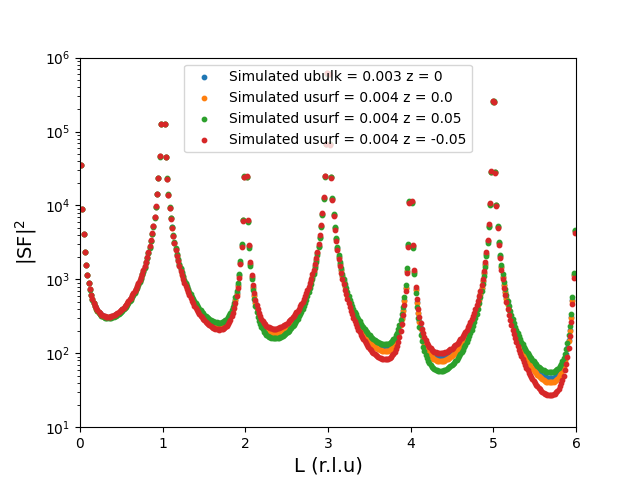

In [31]:
%matplotlib widget
plt.close('all')
plt.yscale('log')

plt.scatter(l,np.abs(F_Ru_27C_sim)**2, s = 10, label = 'Simulated ubulk = 0.003 z = 0')
plt.scatter(l,np.abs(F_Ru_100C_sim)**2, s = 10, label = 'Simulated usurf = 0.004 z = 0.0')
plt.scatter(l,np.abs(F_Ru_200C_sim)**2, s = 10, label = 'Simulated usurf = 0.004 z = 0.05')
plt.scatter(l,np.abs(F_Ru_300C_sim)**2, s = 10, label = 'Simulated usurf = 0.004 z = -0.05')


# plt.title('Various CTR Models for Ru 10L at 75 $\degree$C')

plt.xlim(right = 6, left = 0)
# plt.ylim(top = 10**8, bottom = 10**6)
plt.xlabel('L (r.l.u)', fontsize = 14)
plt.ylabel('|SF|$^2$', fontsize = 14)
plt.yscale('log')
plt.legend()
plt.ylim(top = 10**6, bottom = 10**1)
plt.show()